## Problem Statement
A Chinese automobile company, Geely Auto, aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting car pricing in the American market, as they may differ from the Chinese market. 

The company wants to know the following things:

Which variables are significant in predicting the price of a car?
How well do those variables describe the price of a car?
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the American marof a new market.

## Business Goals

You are required to model the price of cars with the available independent variables. The management will use this model to understand exactly how the prices vary with the independent variables. Accordingly, they can change the design of the cars, the business strategy, etc., to meet certain price levels. Further, the model will allow the management to understand the pricing dynamics of a new market.

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the Data 

In [3]:
df=pd.read_csv(r"D:\UPG_Machine_Learning\Machine learning Module\Assignment\CarPrice_Assignment.csv")

In [4]:
#setting display parameters
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 100)

In [5]:
def make_pretty(styler):
    styler.set_caption("Weather Conditions")
    styler.format(rain_condition)
    styler.format_index(lambda v: v.strftime("%A"))
    styler.background_gradient(axis=None, vmin=1, vmax=5, cmap="YlGnBu")
    return styler

In [6]:
df.head(20)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [7]:
df.shape

(205, 26)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [9]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [11]:
# Dropping Duplicate values if any found
df=df.drop_duplicates()

In [12]:
df.shape

(205, 26)

In [13]:
df.drop('car_ID',axis=1,inplace=True)

In [14]:
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [15]:
def plot_percentages(dataframe, var_list, sortbyindex=False):
# Plot the percentage of car's in the US market with respect to different car features
    plt.figure(figsize=(20, 17))
    for var in var_list:
        plt.subplot(3,4,var_list.index(var)+1)
        values = (dataframe[var].value_counts(normalize=True)*100)
        if sortbyindex:
                values = values.sort_index()
        ax = values.plot.bar(color=sns.color_palette('deep', 16))
        ax.set_ylabel('Percentage wise observation', fontsize=16)
        ax.set_xlabel(var, fontsize=10)
        showLabels(ax)

In [16]:
def plot_cat(var_list):
#Function to plot a list of categorical variables together
    plt.figure(figsize=(20, 15))
    for var in var_list:
        plt.subplot(3,4,var_list.index(var)+1)
        sns.boxplot(x = var, y = 'price', data = df)
    plt.show()

In [17]:
def plot_dist(var_list):
#Function to plot the distribution plot of the numeric variable list
    plt.figure(figsize=(20, 15))
    for var in var_list:
        plt.subplot(3,5,var_list.index(var)+1)
        
    plt.show()

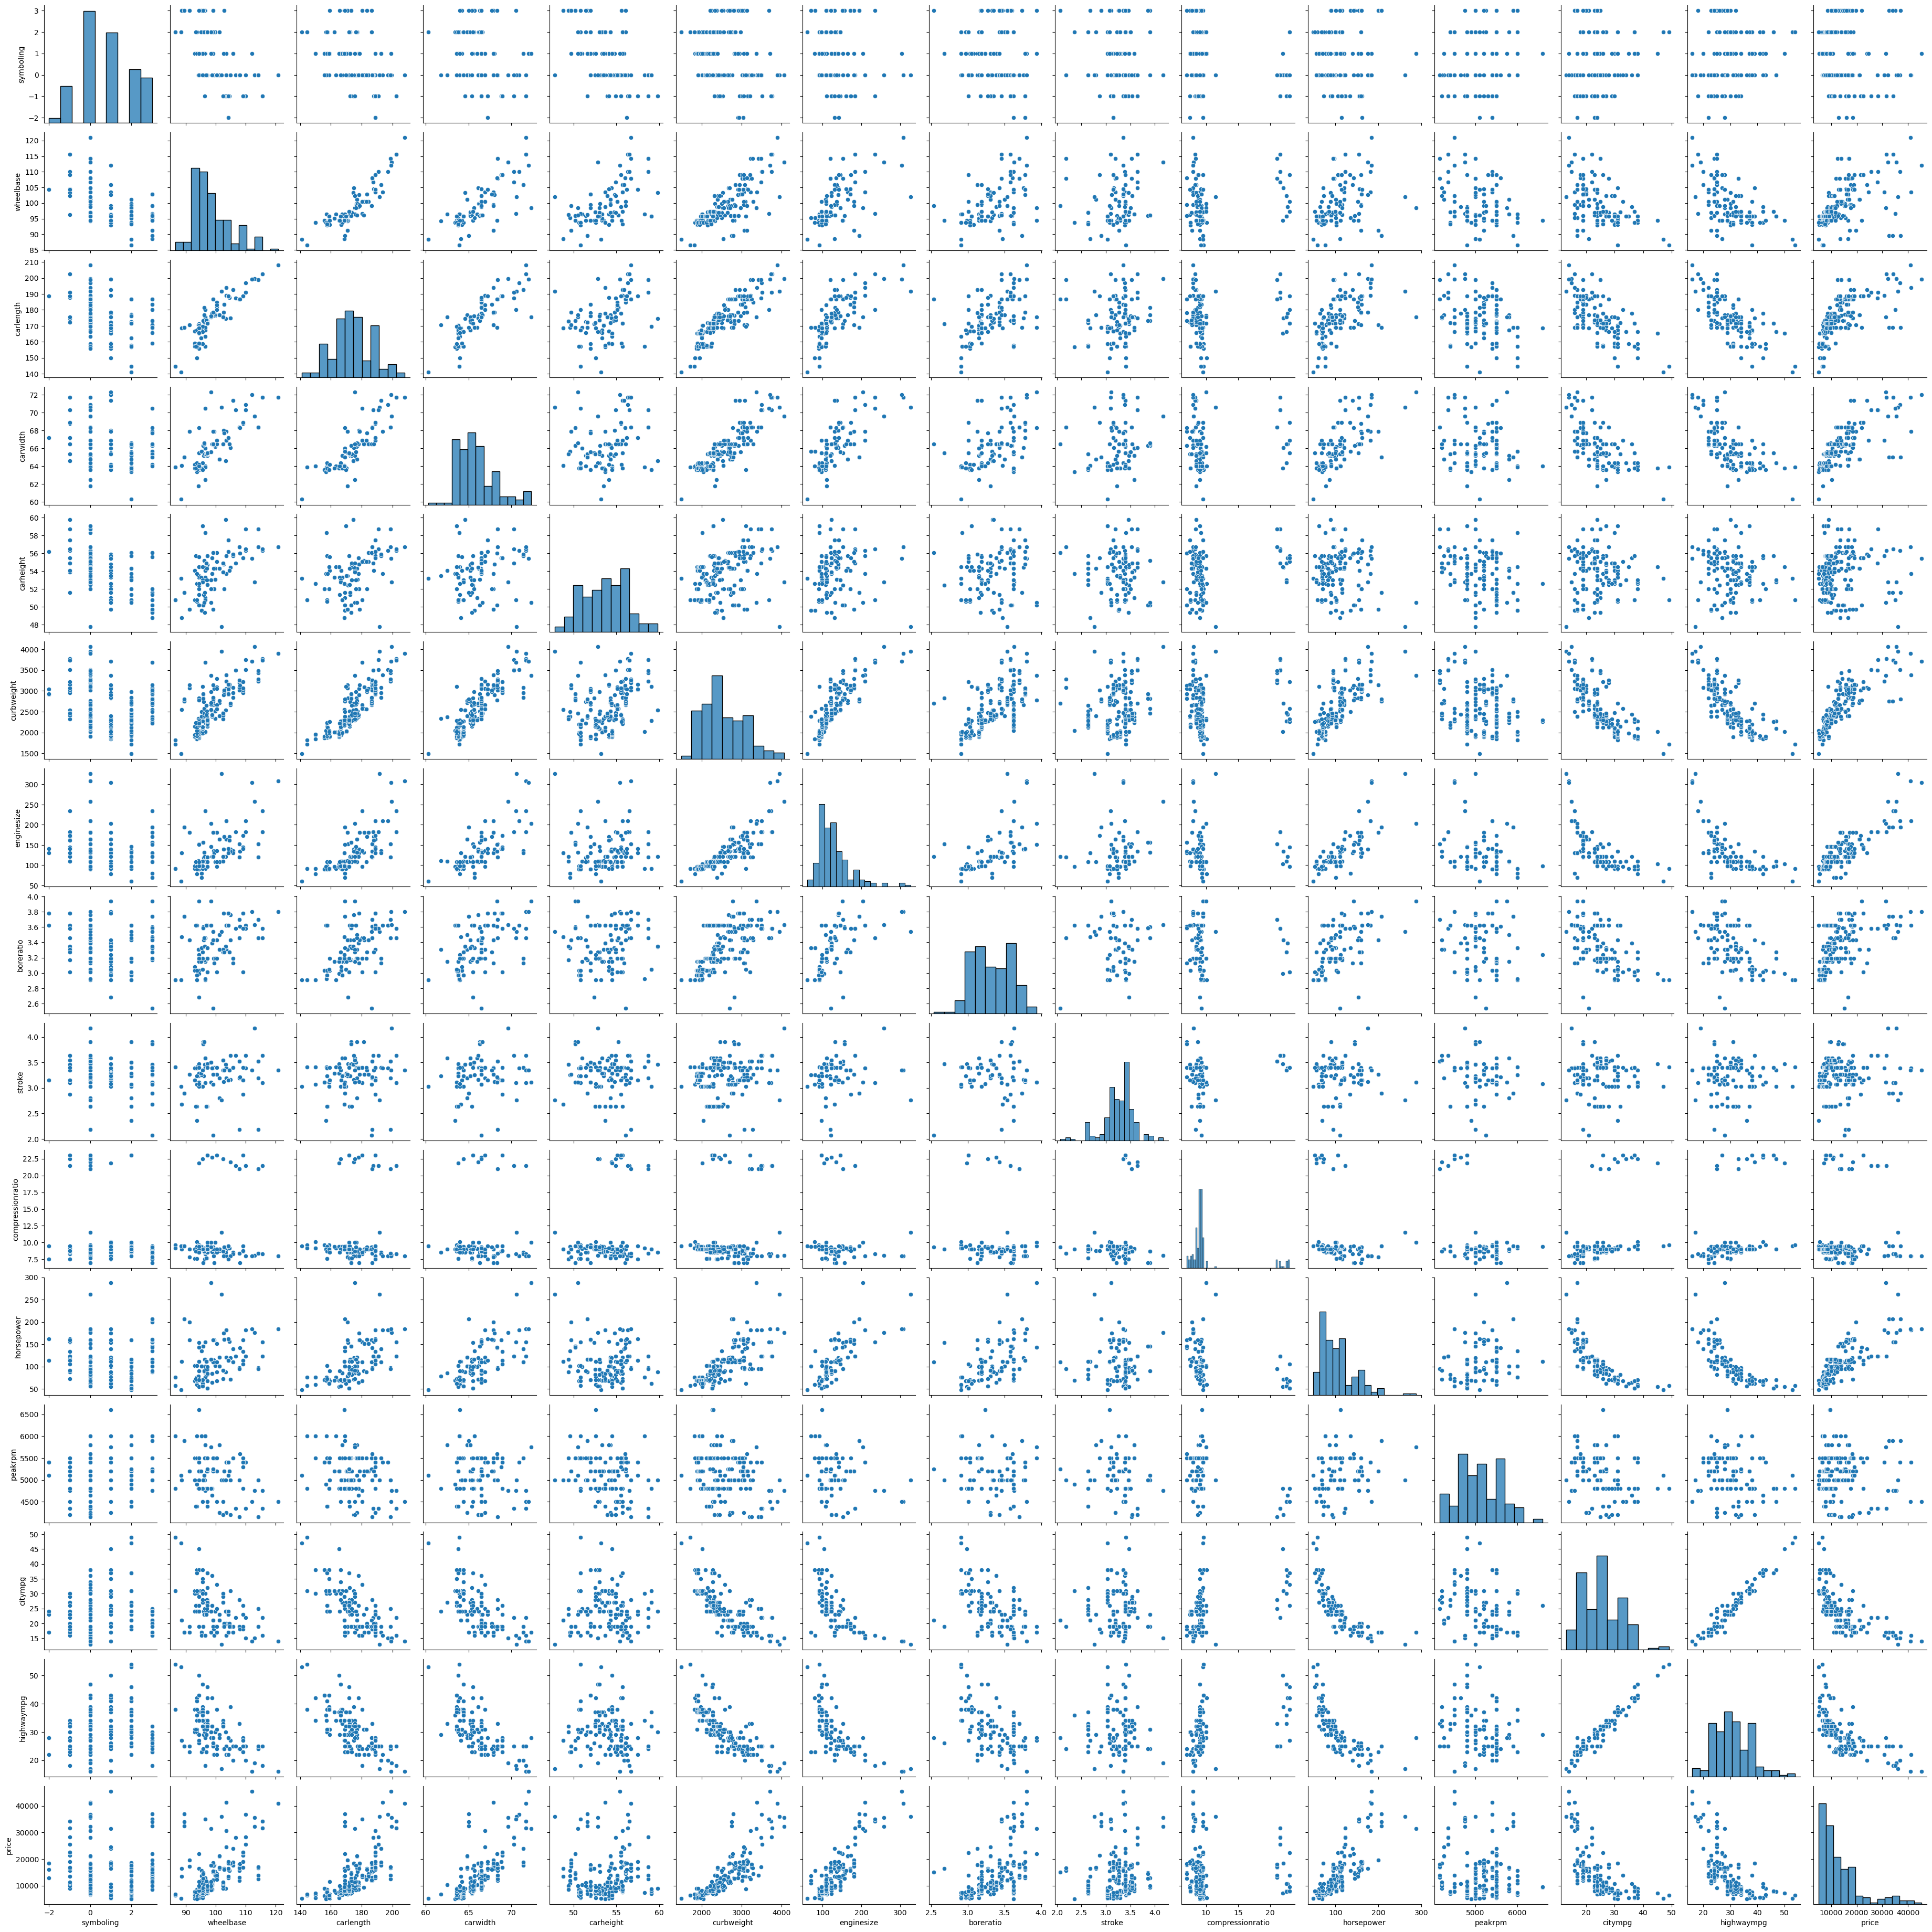

In [18]:
sns.pairplot(df)
plt.show()

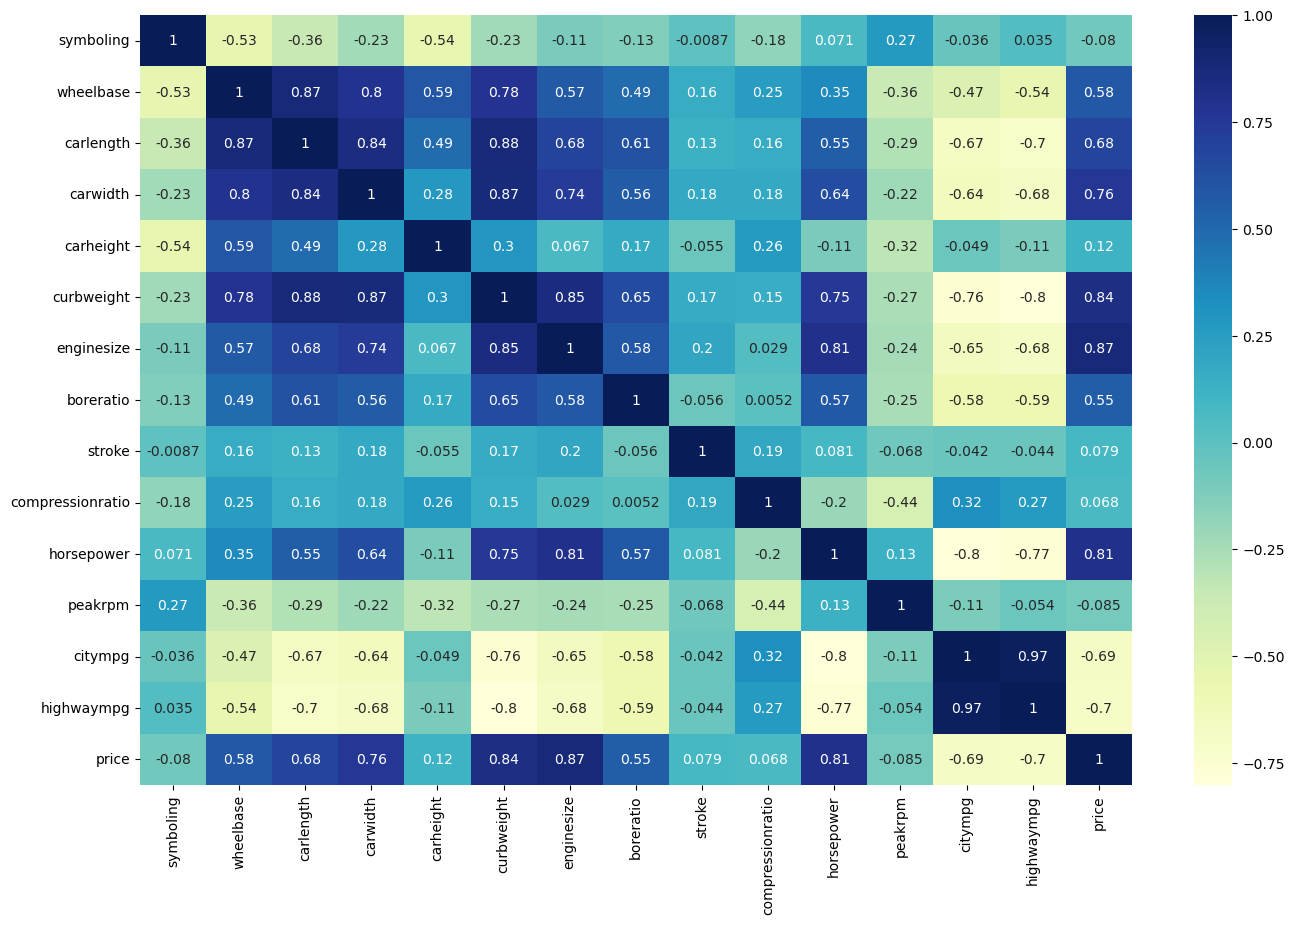

In [19]:
cor=df.corr(numeric_only=True)
plt.figure(figsize = (16, 10))
sns.heatmap(cor, annot = True, cmap="YlGnBu")
plt.show()

### Obervations
Based on our analysis, we can observe the general relationships between features and price. Some features demonstrate a positive relationship with the price variable, including:

-  Car width
-  Bore ratio
-  Engine size
-  Horsepower
-  Wheelbase
-  Curb weight
-  Car length
On the other hand, certain features show a negative relationship with the price variable, such as:

-  Highway MPG
-  City MPG
We will delve deeper into these relationships later. For now, it’s clear that there are some correlations with the price variable. We also notice signs of multicollinearity among the predictor variables:

-  Car length is correlated with car width, curb weight, and wheelbase.
-  Curb weight is correlated with engine size, wheelbase, car length, and car width.
-  Engine size is correlated with horsepower, curb weight, and car dimensions.
-  Highway MPG and city MPG are highly correlated, with a Pearson correlation coefficient of 0.97. We might decide to exclude one of these variables.
-  Additionally, we identify some negative correlations among variables:

-  Curb weight and horsepower are negatively correlated with highway/city MPG.







In [20]:
#symboling is a categorical variable
#required to convert it to numeric type
df['symboling'] = df['symboling'].map({-2: 'safe',-1: 'safe',0: 'moderate',1: 'moderate',2: 'risky',3:'risky'})

In [21]:
df['car_company'] = df['CarName'].apply(lambda x: x.split( )[0])
df.drop('CarName',axis=1,inplace=True)

In [22]:
df[["car_company"]]

,car_company
0,alfa-romero
1,alfa-romero
2,alfa-romero
3,audi
4,audi
...,...
200,volvo
201,volvo
202,volvo
203,volvo


In [23]:
df['car_company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [24]:
df['car_company'].replace('maxda','mazda',inplace=True)
df['car_company'].replace('Nissan','nissan',inplace=True)
df['car_company'].replace('porcshce','porsche',inplace=True)
df['car_company'].replace('toyouta','toyota',inplace=True)
df['car_company'].replace(['vokswagen','vw'],'volkswagen',inplace=True)

In [25]:
categorical_variables = list(df.columns[df.dtypes == 'object'])
categorical_variables

['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'car_company']

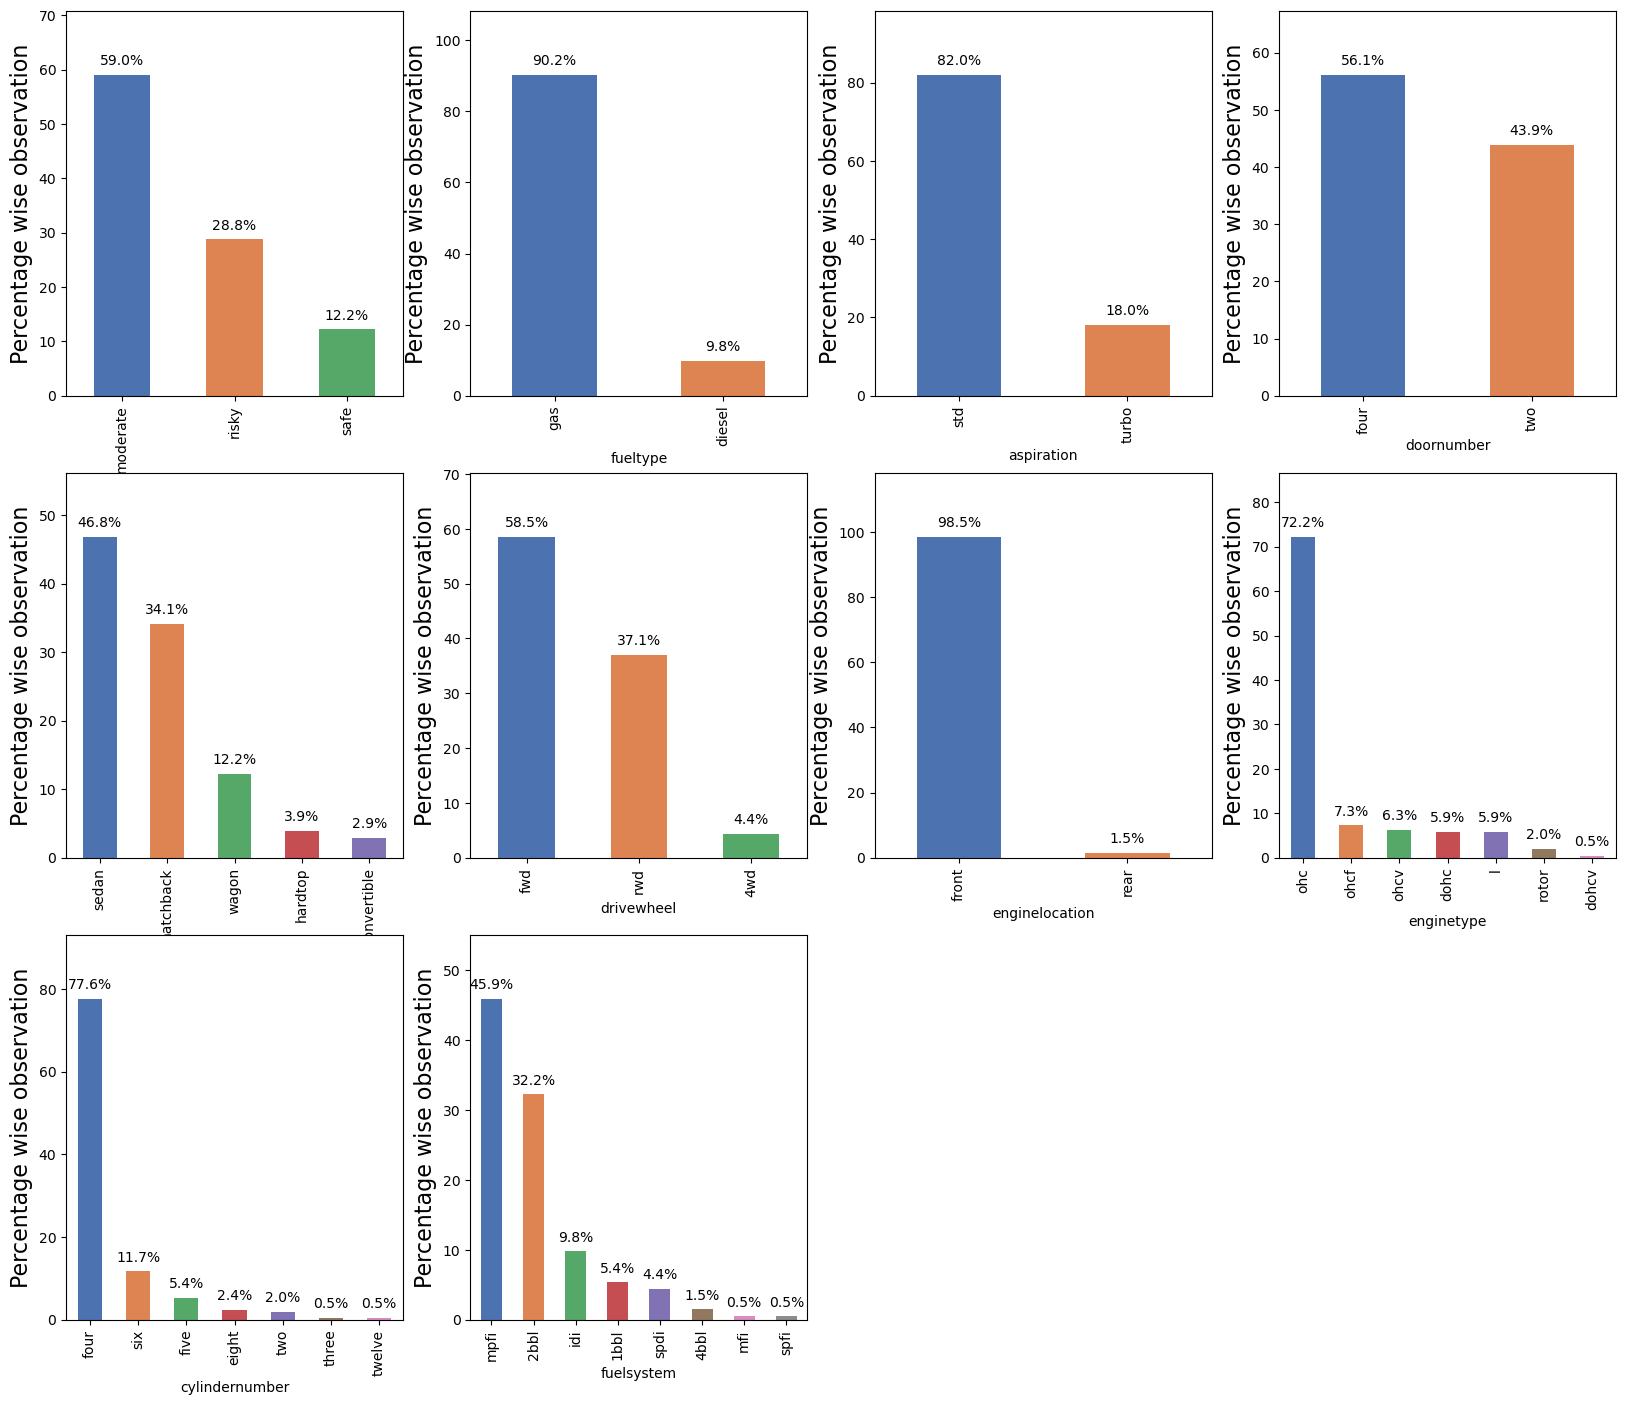

In [26]:
# market percentage of car's with respect to features
plot_percentages(df,categorical_variables[:-1])

We can pinpoint some key car features that dominate the US automobile market. Geely Automotives can take these insights into account to meet market demands and make necessary adjustments to their manufacturing process. These features include:

- Symboling: moderate (0,1)
- Car body: Sedan
- Fuel type: Gas
- Aspiration: Standard
- Door numbers: Four
- Drive wheel: Forward
- Engine location: Front
- Engine type: OHC
- Cylinder number: Four
- Fuel system: MPFI

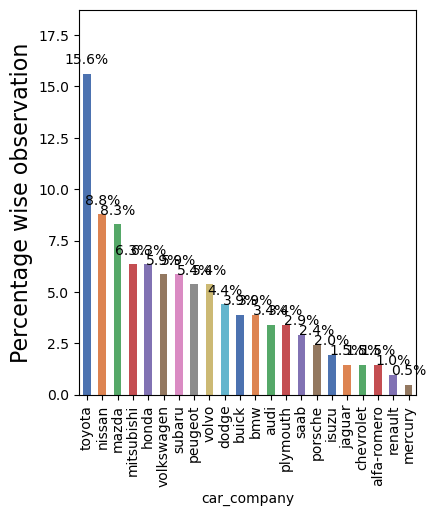

In [27]:
plot_percentages(df,[categorical_variables[-1]])

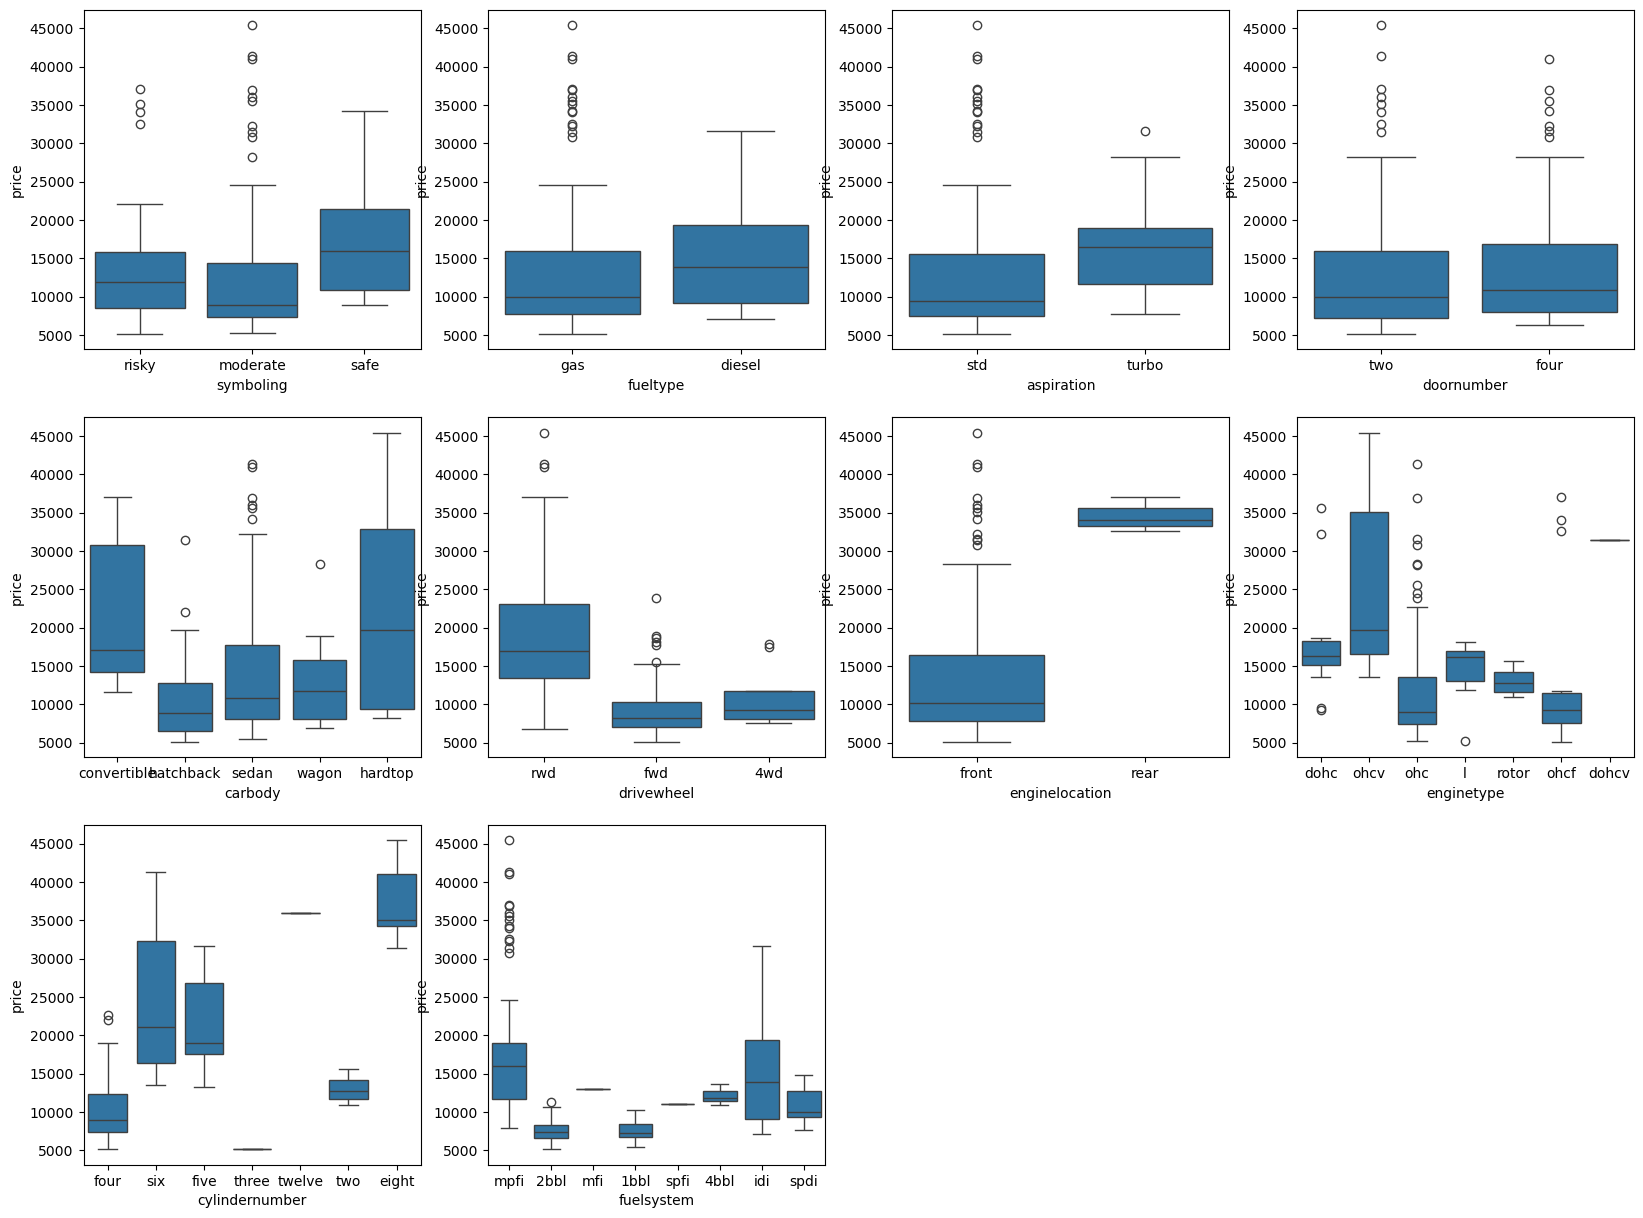

In [28]:
# ploting all variables against the output variable
plot_cat(categorical_variables[:-1])

### Observations
While not definitive, fuel type appears to influence car pricing. We'll verify this later. Engine location and aspiration clearly have a noticeable impact on car prices. Rear-wheel-drive vehicles are significantly more expensive than other drive wheel options. Cylinder number and engine type also seem to play a role in regulating car prices. Hardtop and convertible cars are definitely priced higher than other body types, indicating that the car body type is a contributing factor in determining price. Next, let's examine how prices vary among different automobile companies in the US market.

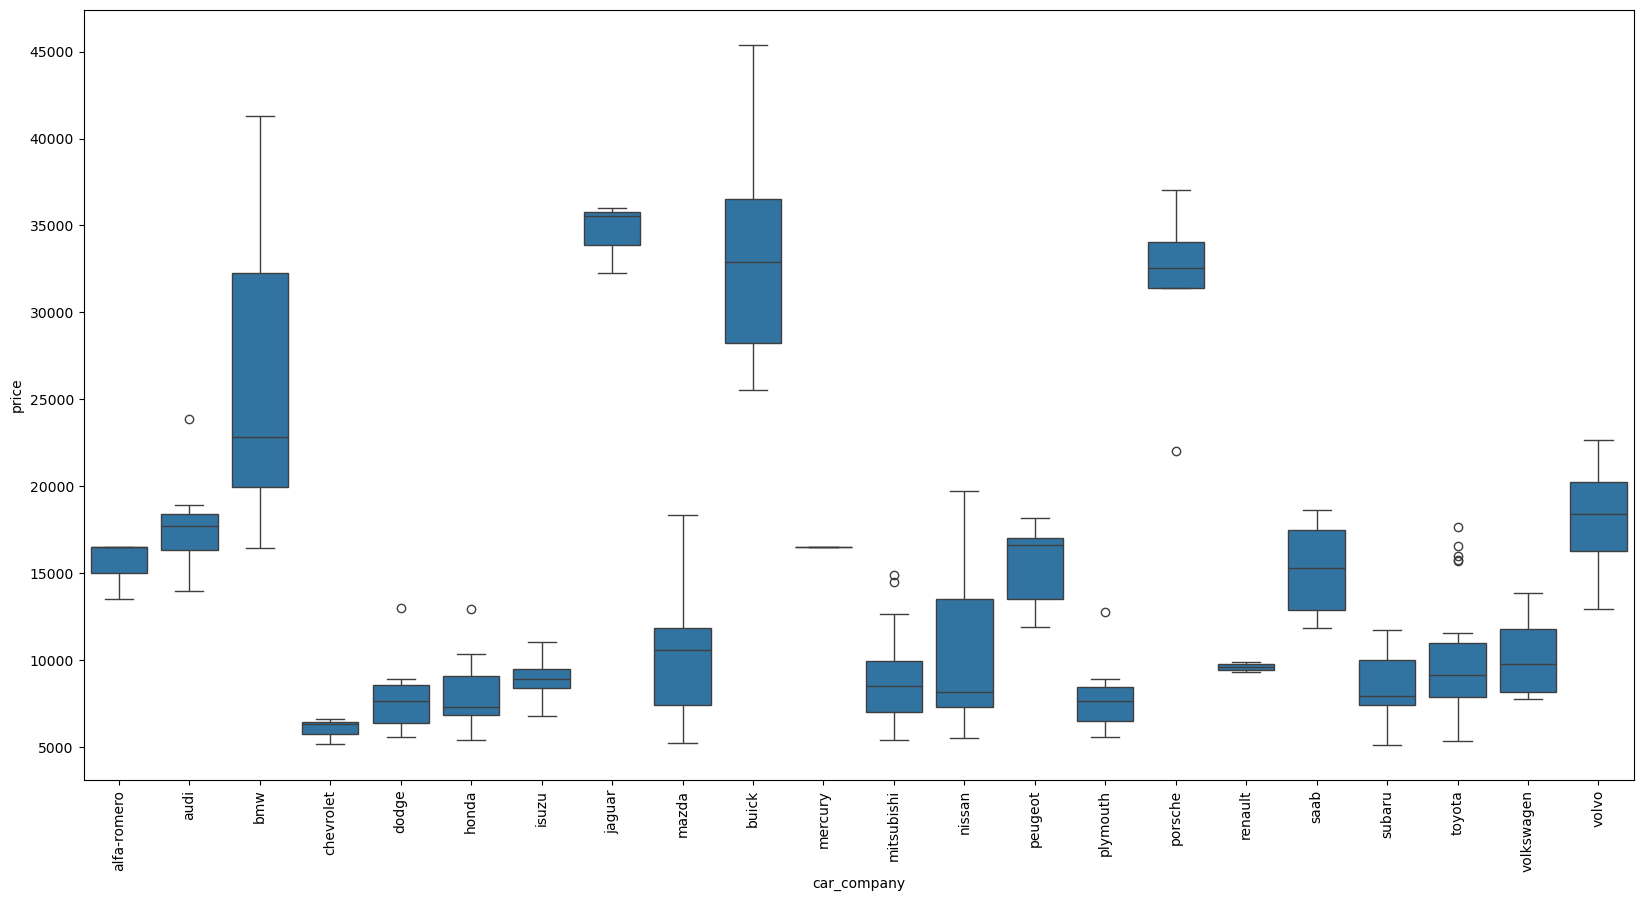

Average US car price:  13276.710570731706
car_company
jaguar     34600.000000
buick      33647.000000
porsche    31400.500000
bmw        26118.750000
volvo      18063.181818
Name: price, dtype: float64


In [29]:
#comparison of  company wise performance 
plt.figure(figsize=(20,10))
sns.boxplot(x = categorical_variables[-1], y = 'price', data =df)
plt.xticks(rotation=90)
plt.show()
print('Average US car price: ',df['price'].mean())
print(df.groupby('car_company').price.mean().sort_values(ascending=False).head())

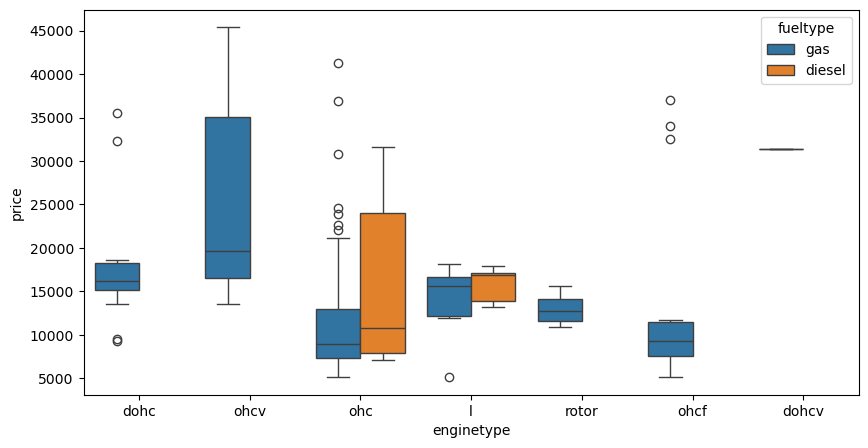

In [30]:
plt.figure(figsize=(10,5))
sns.boxplot(x='enginetype', y='price', hue = 'fueltype', data=df)
plt.show()

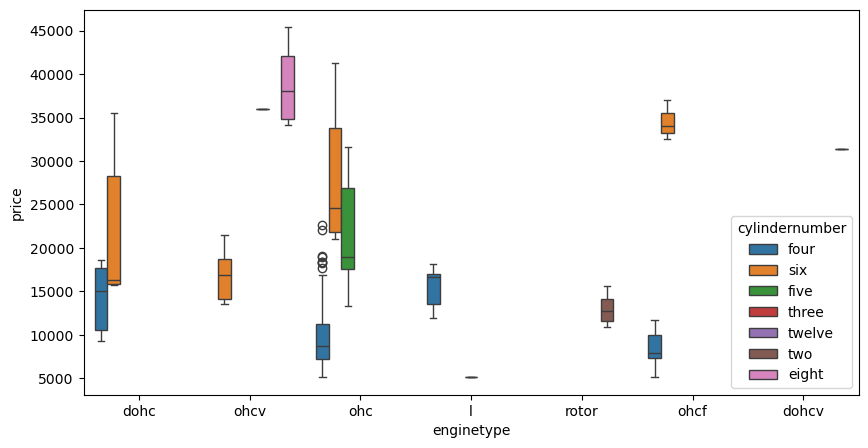

In [31]:
plt.figure(figsize=(10,5))
sns.boxplot(x='enginetype', y='price', hue = 'cylindernumber', data=df)
plt.show()

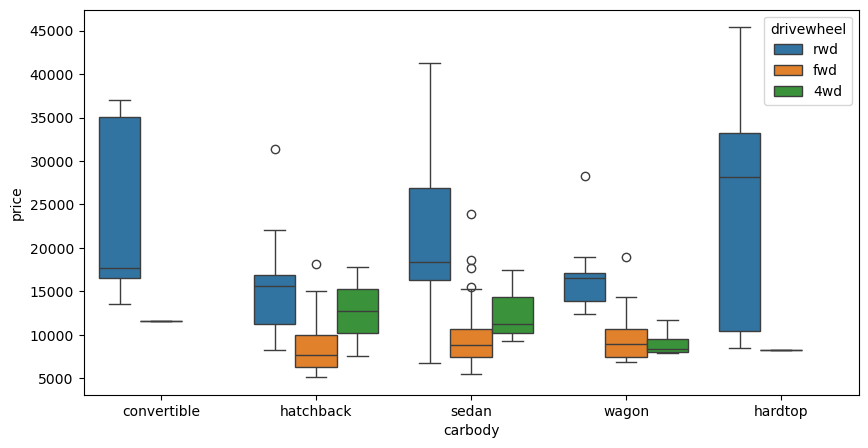

In [32]:
plt.figure(figsize=(10,5))
sns.boxplot(x='carbody', y='price', hue = 'drivewheel', data=df)
plt.show()

### Treating the outliers


In [33]:
def plot_dist2(data, var_list):
    # Function to plot the distribution plot of the numeric variable list
    num_vars = len(var_list)
    rows = (num_vars // 5) + 1  # Number of rows needed for subplots (5 plots per row)
    plt.figure(figsize=(20, 15))
    
    for i, var in enumerate(var_list):
        plt.subplot(rows, 5, i + 1)  # Create subplots
        sns.histplot(data[var], kde=True)  # Use seaborn's histplot for better visualization
        plt.title(var)
    
    plt.tight_layout()  # Adjust subplots to fit into the figure area
    plt.show()

['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


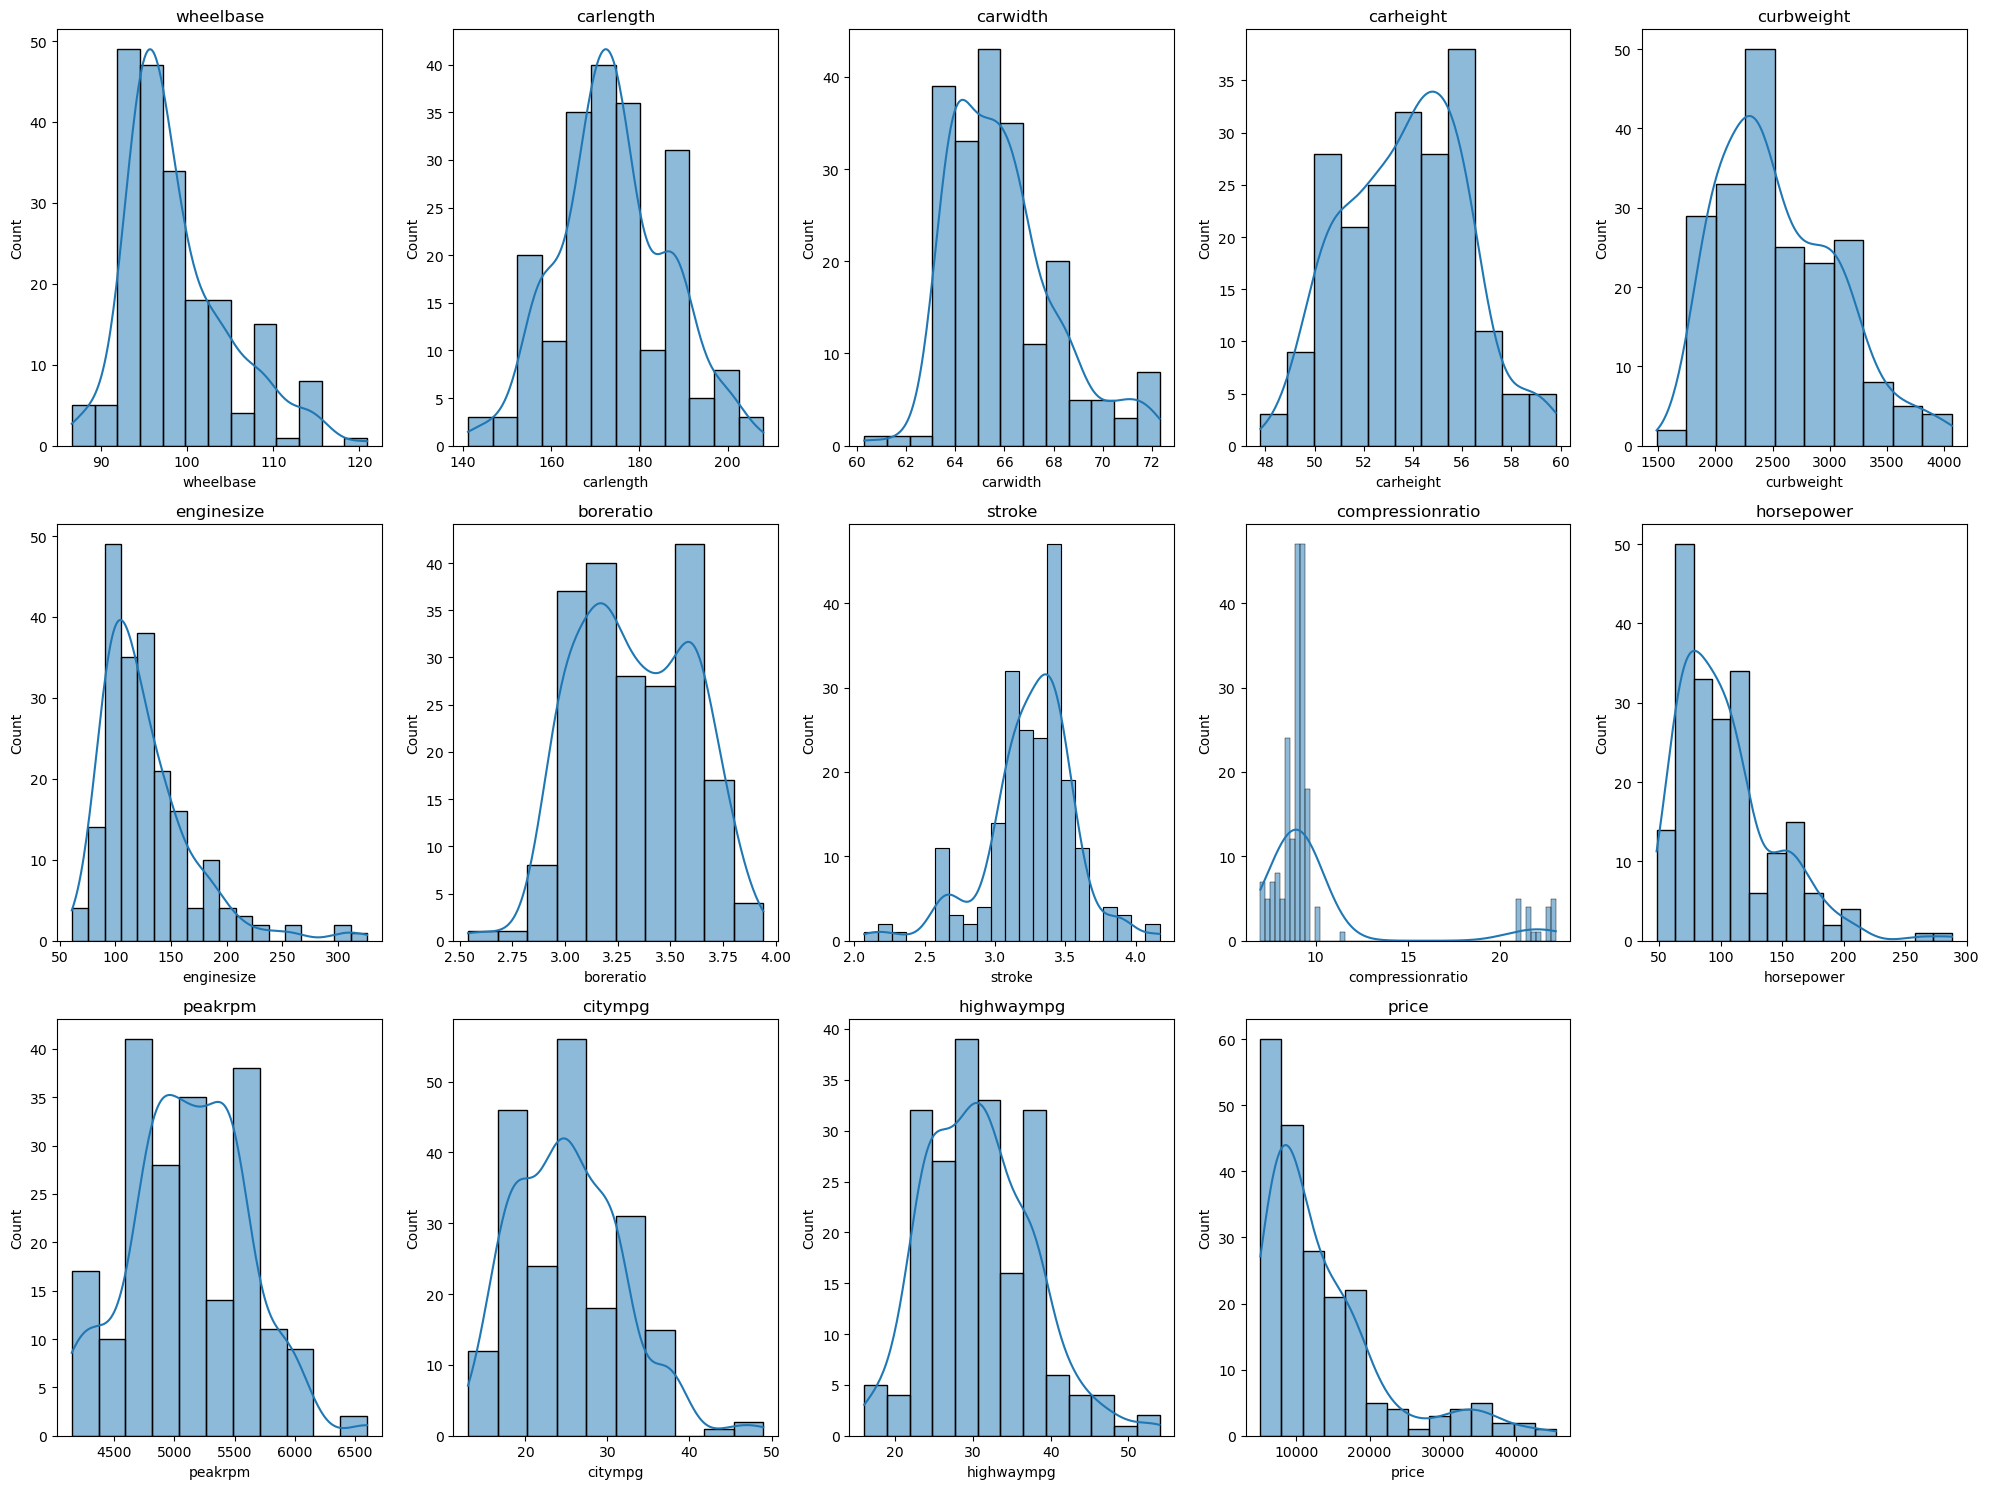

In [34]:
num_var = list(df.columns[df.dtypes != 'object'])
print(num_var)
plot_dist2(df,num_var)


Presence of outliers can actually impact the skewness of distribution as is evident from above. Hence we will treat the variables accordingly

In [35]:
print(df[['horsepower','curbweight','enginesize']].quantile([0.01, .96]))
print(df[['compressionratio']].quantile([0.01, .90]))

      horsepower  curbweight  enginesize
0.01       52.12     1819.72        70.0
0.96      182.00     3657.80       209.0
      compressionratio
0.01              7.00
0.90             10.94


Extracting the variables curbweight','horsepower','enginesize' at 96 precentile value and compressionratio at 90 percentile value will help in effective treatment of outliers

In [36]:
# Outilers in price of cars
df['horsepower'][np.abs(df['horsepower'] > 182.00)]= 182.00
df['horsepower'][np.abs(df['horsepower'] > 3657.80)]= 3657.80
df['enginesize'][np.abs(df['enginesize'] > 209.00)]= 209.00
df['compressionratio'][np.abs(df['compressionratio'] > 10.94)]= 10.94

In [37]:
df= df[np.abs(df.price-df.price.mean()) <= (3*df.price.std())]

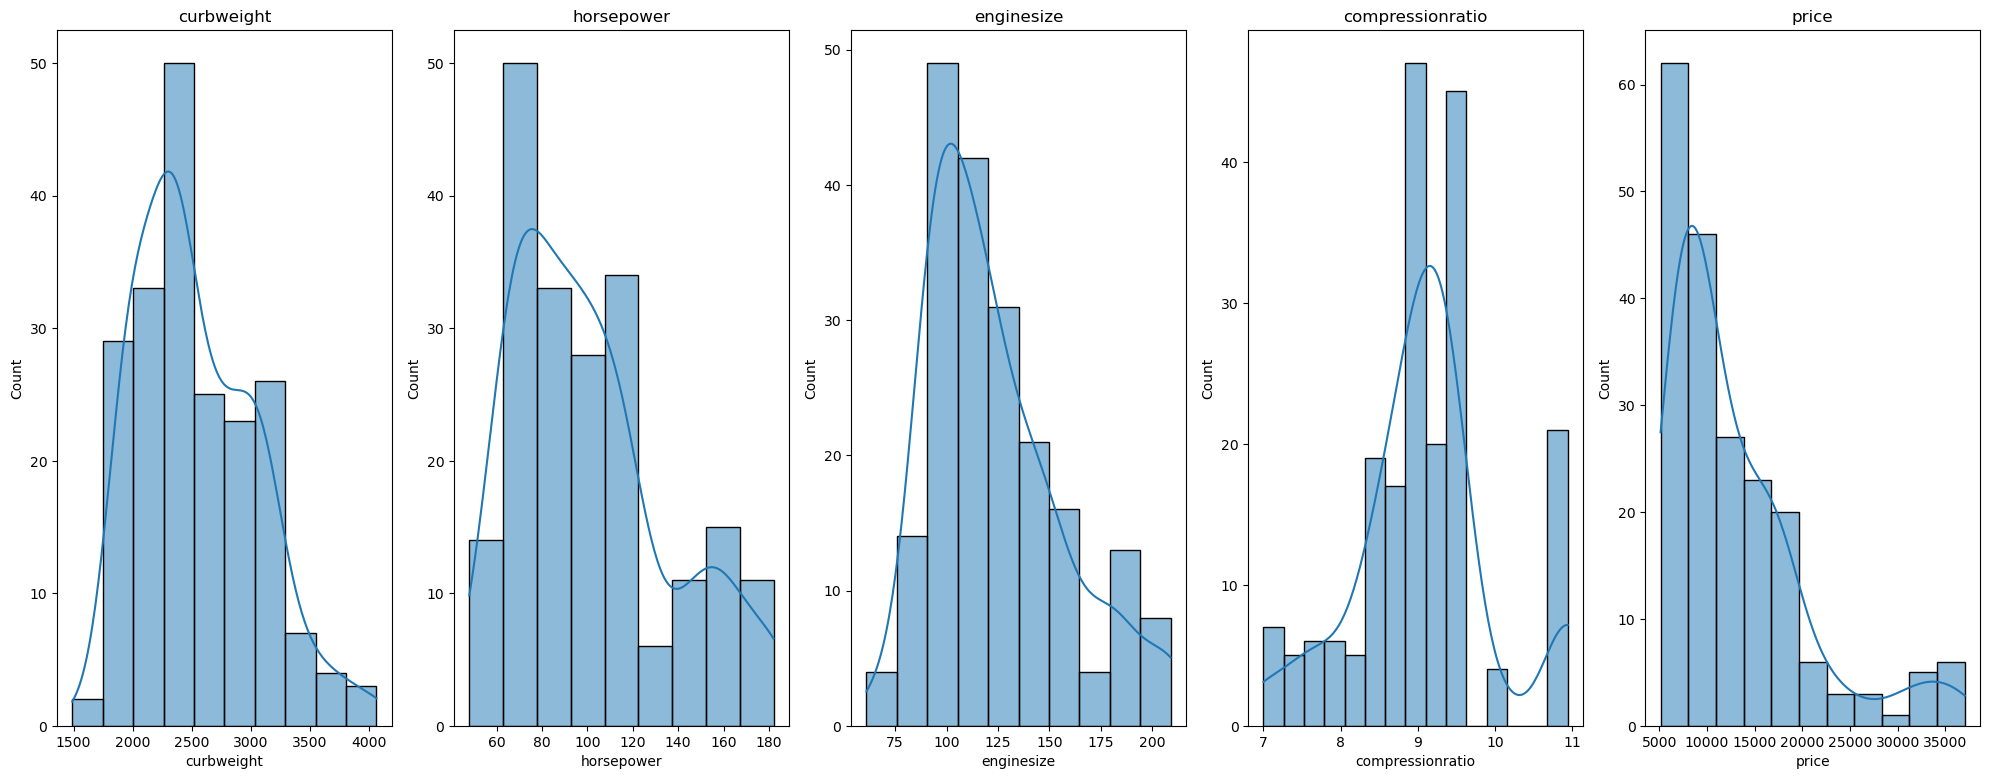

In [38]:
plot_dist2(df, ['curbweight','horsepower','enginesize','compressionratio','price'])

### Creating new variables
This will be helpful to remove corelated variables.

Earlier, from the scatter plot and the heatmap, we noticed there is a high correlation between carlength, wheelbase, car width, car weight and city/highway mpg's. Lets create new variables from these to try reducing the multicolinearlity.

In [39]:
# Creating new variable carLWratio
df['carLWratio'] = df.carlength/df.carwidth
# Creating new variable carWHratio
df['carWHratio'] = df.carwidth/df.carheight
# Creating new variable PWratio
df['PWratio'] = df.horsepower/df.curbweight
# Creating new variable HCmpgratio
df['HCmpgratio'] = df.highwaympg/df.citympg
## droping the orignal variables
df.drop(['carlength','carwidth','carheight','highwaympg','citympg'],axis=1,inplace=True)

We will segment the car companies based on the mean company price as lowrange,midrange and highrange

In [40]:
df.groupby('car_company').price.mean().sort_values(ascending=False)

car_company
jaguar         34600.000000
porsche        31400.500000
buick          30469.333333
bmw            23947.857143
volvo          18063.181818
audi           17859.166714
mercury        16503.000000
alfa-romero    15498.333333
peugeot        15489.090909
saab           15223.333333
mazda          10652.882353
nissan         10415.666667
volkswagen     10077.500000
toyota          9885.812500
renault         9595.000000
mitsubishi      9239.769231
isuzu           8916.500000
subaru          8541.250000
honda           8184.692308
plymouth        7963.428571
dodge           7875.444444
chevrolet       6007.000000
Name: price, dtype: float64

In [41]:
company_segment_dict = {
    'cheverolet' : 'lowrange',
    'dodge' : 'lowrange',
    'plymouth' : 'lowrange',
    'honda' : 'lowrange',
    'subaru' : 'lowrange',
    'isuzu' : 'lowrange',
    'mitsubishi' : 'lowrange',
    'renault' : 'lowrange',
    'toyota' : 'lowrange',
    'volkswagen' : 'midrange',
    'nissan' : 'midrange',
    'mazda' : 'midrange',
    'saab' : 'midrange',
    'peugeot' : 'midrange',
    'alfa-romero' : 'midrange',
    'mercury' : 'midrange',
    'audi' : 'midrange',
    'volvo' : 'midrange',
    'bmw' : 'highrange',
    'buick' : 'highrange',
    'porsche' : 'highrange',
    'jaguar' : 'highrange',
    }
df['company_segment'] = df['car_company'].map(company_segment_dict)
# Dropping the orignal car_company variable
df.drop('car_company',axis=1,inplace=True)
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,carLWratio,carWHratio,PWratio,HCmpgratio,company_segment
0,risky,gas,std,two,convertible,rwd,front,88.6,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,2.633385,1.313525,0.043564,1.285714,midrange
1,risky,gas,std,two,convertible,rwd,front,88.6,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,2.633385,1.313525,0.043564,1.285714,midrange
2,moderate,gas,std,two,hatchback,rwd,front,94.5,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,2.613740,1.250000,0.054552,1.368421,midrange
3,risky,gas,std,four,sedan,fwd,front,99.8,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,2.667674,1.219153,0.043646,1.250000,midrange
4,risky,gas,std,four,sedan,4wd,front,99.4,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,2.659639,1.222836,0.040722,1.222222,midrange


In [42]:
df.groupby('company_segment').price.mean()

company_segment
highrange    29107.309524
lowrange      8987.369565
midrange     13231.839151
Name: price, dtype: float64

### Treatment of Categorial Variable

In [43]:
# Converting categorical variables with two levels to either 1 or 0
df['fueltype'] = df['fueltype'].map({'gas': 1, 'diesel': 0})
df['aspiration'] = df['aspiration'].map({'std': 1, 'turbo': 0})
df['doornumber'] = df['doornumber'].map({'two': 1, 'four': 0})
df['enginelocation'] = df['enginelocation'].map({'front': 1, 'rear': 0})
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,carLWratio,carWHratio,PWratio,HCmpgratio,company_segment
0,risky,1,1,1,convertible,rwd,1,88.6,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,2.633385,1.313525,0.043564,1.285714,midrange
1,risky,1,1,1,convertible,rwd,1,88.6,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,2.633385,1.313525,0.043564,1.285714,midrange
2,moderate,1,1,1,hatchback,rwd,1,94.5,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,2.613740,1.250000,0.054552,1.368421,midrange
3,risky,1,1,0,sedan,fwd,1,99.8,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,2.667674,1.219153,0.043646,1.250000,midrange
4,risky,1,1,0,sedan,4wd,1,99.4,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,2.659639,1.222836,0.040722,1.222222,midrange


In [44]:
# Creating dummy variables
df2 = pd.get_dummies(df)
# Droping 1 dummy variable and Keeping n-1 varaibles for each feature 
df2.drop(['symboling_risky',
         'carbody_hatchback',
         'drivewheel_4wd',
         'enginetype_l',
         'cylindernumber_three',
         'fuelsystem_1bbl',
         'company_segment_lowrange'],axis=1,inplace=True)
df2.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'price',
       'carLWratio', 'carWHratio', 'PWratio', 'HCmpgratio', 'symboling_moderate', 'symboling_safe',
       'carbody_convertible', 'carbody_hardtop', 'carbody_sedan', 'carbody_wagon',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohc', 'enginetype_dohcv', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_eight',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'company_segment_highrange', 'company_segment_midrange'],
      dtype='object')

In [51]:
from sklearn.model_selection import train_test_split

# Splitting data into training and testing set.

df_train, df_test = train_test_split(df2, train_size = 0.7, test_size = 0.3, random_state = 100)

### Feature Scaling

In [46]:
from sklearn.preprocessing import MinMaxScaler
# Using MinMaxScaler to scale all the numeric variables in the same scale between 0 and 1.
scaler = MinMaxScaler()

In [52]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['horsepower','wheelbase','curbweight', 'enginesize', 'boreratio','carLWratio','carWHratio','PWratio','HCmpgratio','stroke','compressionratio','peakrpm','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,carLWratio,carWHratio,PWratio,HCmpgratio,symboling_moderate,symboling_safe,carbody_convertible,carbody_hardtop,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_segment_highrange,company_segment_midrange
1,1,1,1,1,0.068966,0.411171,0.466216,0.664286,0.290476,0.507614,0.470149,0.346939,0.358353,0.574393,0.592205,0.512513,0.441558,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True
165,1,1,1,1,0.272414,0.301396,0.250000,0.500000,0.480952,0.609137,0.477612,1.000000,0.131604,0.578350,0.350729,0.640155,0.178322,True,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
197,1,1,0,1,0.610345,0.602793,0.540541,0.885714,0.514286,0.634518,0.492537,0.510204,0.358825,0.847483,0.230896,0.380453,0.257576,False,True,False,False,False,True,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True
169,1,1,1,1,0.406897,0.412335,0.574324,0.771429,0.680952,0.583756,0.507463,0.265306,0.153359,0.655931,0.462513,0.553916,0.386364,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
190,1,1,1,1,0.272414,0.284329,0.324324,0.464286,0.633333,0.380711,0.313433,0.551020,0.153076,0.505674,0.421594,0.446544,0.321970,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True


In [53]:
df_train.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,carLWratio,carWHratio,PWratio,HCmpgratio
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,0.886525,0.794326,0.439716,0.985816,0.413402,0.411779,0.420979,0.559980,0.551570,0.536415,0.395469,0.392387,0.247719,0.577906,0.371315,0.417351,0.351657
std,0.318304,0.405634,0.498122,0.118672,0.198892,0.198452,0.225970,0.192528,0.150278,0.229812,0.251396,0.199860,0.229291,0.184524,0.156047,0.177756,0.143889
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.272414,0.254849,0.243243,0.421429,0.490476,0.406091,0.164179,0.265306,0.087432,0.479683,0.275790,0.309148,0.275974
50%,1.000000,1.000000,0.000000,1.000000,0.358621,0.359193,0.337838,0.550000,0.571429,0.507614,0.350746,0.387755,0.175682,0.578580,0.346648,0.382528,0.348974
75%,1.000000,1.000000,1.000000,1.000000,0.503448,0.552366,0.540541,0.742857,0.633333,0.609137,0.507463,0.551020,0.342548,0.701714,0.453372,0.510662,0.406699
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
#dividing X and Y for model building
y_train = df_train.pop('price')
X_train = df_train

### Recursive feature elimination

In [55]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [57]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step = 15)             # running RFE and selecting 15 features best describing the price of cars
rfe = rfe.fit(X_train, y_train)

In [58]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 2),
 ('aspiration', True, 1),
 ('doornumber', False, 3),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('curbweight', False, 3),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 2),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('carLWratio', True, 1),
 ('carWHratio', True, 1),
 ('PWratio', True, 1),
 ('HCmpgratio', False, 3),
 ('symboling_moderate', False, 3),
 ('symboling_safe', False, 3),
 ('carbody_convertible', True, 1),
 ('carbody_hardtop', False, 3),
 ('carbody_sedan', False, 3),
 ('carbody_wagon', False, 3),
 ('drivewheel_fwd', False, 3),
 ('drivewheel_rwd', False, 3),
 ('enginetype_dohc', True, 1),
 ('enginetype_dohcv', False, 3),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', True, 1),
 ('enginetype_ohcv', False, 3),
 ('enginetype_rotor', False, 2),
 ('cylindernumber_eight', True, 1),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', True, 1)

In [59]:
col = X_train.columns[rfe.support_]
col

Index(['aspiration', 'enginelocation', 'wheelbase', 'enginesize', 'boreratio', 'stroke',
       'horsepower', 'peakrpm', 'carLWratio', 'carWHratio', 'PWratio', 'carbody_convertible',
       'enginetype_dohc', 'enginetype_ohc', 'enginetype_ohcf', 'cylindernumber_eight',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_twelve',
       'fuelsystem_4bbl', 'company_segment_highrange'],
      dtype='object')

In [60]:
X_train.columns[~rfe.support_]

Index(['fueltype', 'doornumber', 'curbweight', 'compressionratio', 'HCmpgratio',
       'symboling_moderate', 'symboling_safe', 'carbody_hardtop', 'carbody_sedan', 'carbody_wagon',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'company_segment_midrange'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [61]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [86]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:
#Custom Function for model fitting
def fit_LRM(X_train):
#Function to fit the linear regression model from the statmodel package
# Creating X_train dataframe with the selected variables
    # Adding a constant variable  
    X_train = sm.add_constant(X_train)
    lm = sm.OLS(y_train,X_train).fit() 
    print(lm.summary())
    return lm

In [68]:
def getVIF(X_train):
    #X_train = df.drop(['const'], axis=1)
    # Calculate the VIFs for the new model
    vif = pd.DataFrame()
    X = X_train
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [70]:
lm=fit_LRM(X_train_rfe.astype(float))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     122.1
Date:                Sat, 01 Jun 2024   Prob (F-statistic):           1.49e-70
Time:                        15:31:30   Log-Likelihood:                 231.43
No. Observations:                 141   AIC:                            -416.9
Df Residuals:                     118   BIC:                            -349.0
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [73]:
#fuelsystem_4bbl has a p-value > 0.05. Hence we will improve
X_train1 = X_train_rfe.drop('fuelsystem_4bbl', axis=1)

In [72]:
lm1=fit_LRM(X_train1.astype(float))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     126.7
Date:                Sat, 01 Jun 2024   Prob (F-statistic):           3.57e-71
Time:                        15:32:53   Log-Likelihood:                 230.22
No. Observations:                 141   AIC:                            -416.4
Df Residuals:                     119   BIC:                            -351.6
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [74]:
#cylindernumber_five has a p-value > 0.05 Hencw we will remove it
X_train2 = X_train1.drop('cylindernumber_five', axis=1)

In [75]:
lm2=fit_LRM(X_train2.astype(float))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     131.5
Date:                Sat, 01 Jun 2024   Prob (F-statistic):           9.29e-72
Time:                        15:35:05   Log-Likelihood:                 228.90
No. Observations:                 141   AIC:                            -415.8
Df Residuals:                     120   BIC:                            -353.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [77]:
X_train3 = X_train2.drop('cylindernumber_six', axis=1)

In [78]:
lm3=fit_LRM(X_train3.astype(float))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     139.3
Date:                Sat, 01 Jun 2024   Prob (F-statistic):           8.63e-73
Time:                        15:41:48   Log-Likelihood:                 228.77
No. Observations:                 141   AIC:                            -417.5
Df Residuals:                     121   BIC:                            -358.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [79]:
X_train4 = X_train3.drop('carLWratio', axis=1)

In [81]:
lm4=fit_LRM(X_train4.astype(float))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     147.8
Date:                Sat, 01 Jun 2024   Prob (F-statistic):           8.35e-74
Time:                        15:42:37   Log-Likelihood:                 228.56
No. Observations:                 141   AIC:                            -419.1
Df Residuals:                     122   BIC:                            -363.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [83]:
X_train4 = X_train3.drop(['enginesize','boreratio', 'enginetype_dohc', 'enginetype_ohcf', 'cylindernumber_eight', 'cylindernumber_twelve'], axis=1)

In [84]:
lm4=fit_LRM(X_train4.astype(float))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     207.9
Date:                Sat, 01 Jun 2024   Prob (F-statistic):           7.51e-79
Time:                        15:45:51   Log-Likelihood:                 226.90
No. Observations:                 141   AIC:                            -425.8
Df Residuals:                     127   BIC:                            -384.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [87]:
getVIF(X_train4.astype(float))

,Features,VIF
8,PWratio,65.53
4,horsepower,60.89
1,enginelocation,54.68
6,carLWratio,32.60
2,wheelbase,24.91
3,stroke,21.06
7,carWHratio,14.50
5,peakrpm,9.08
11,cylindernumber_four,8.87
0,aspiration,7.56


<Axes: >

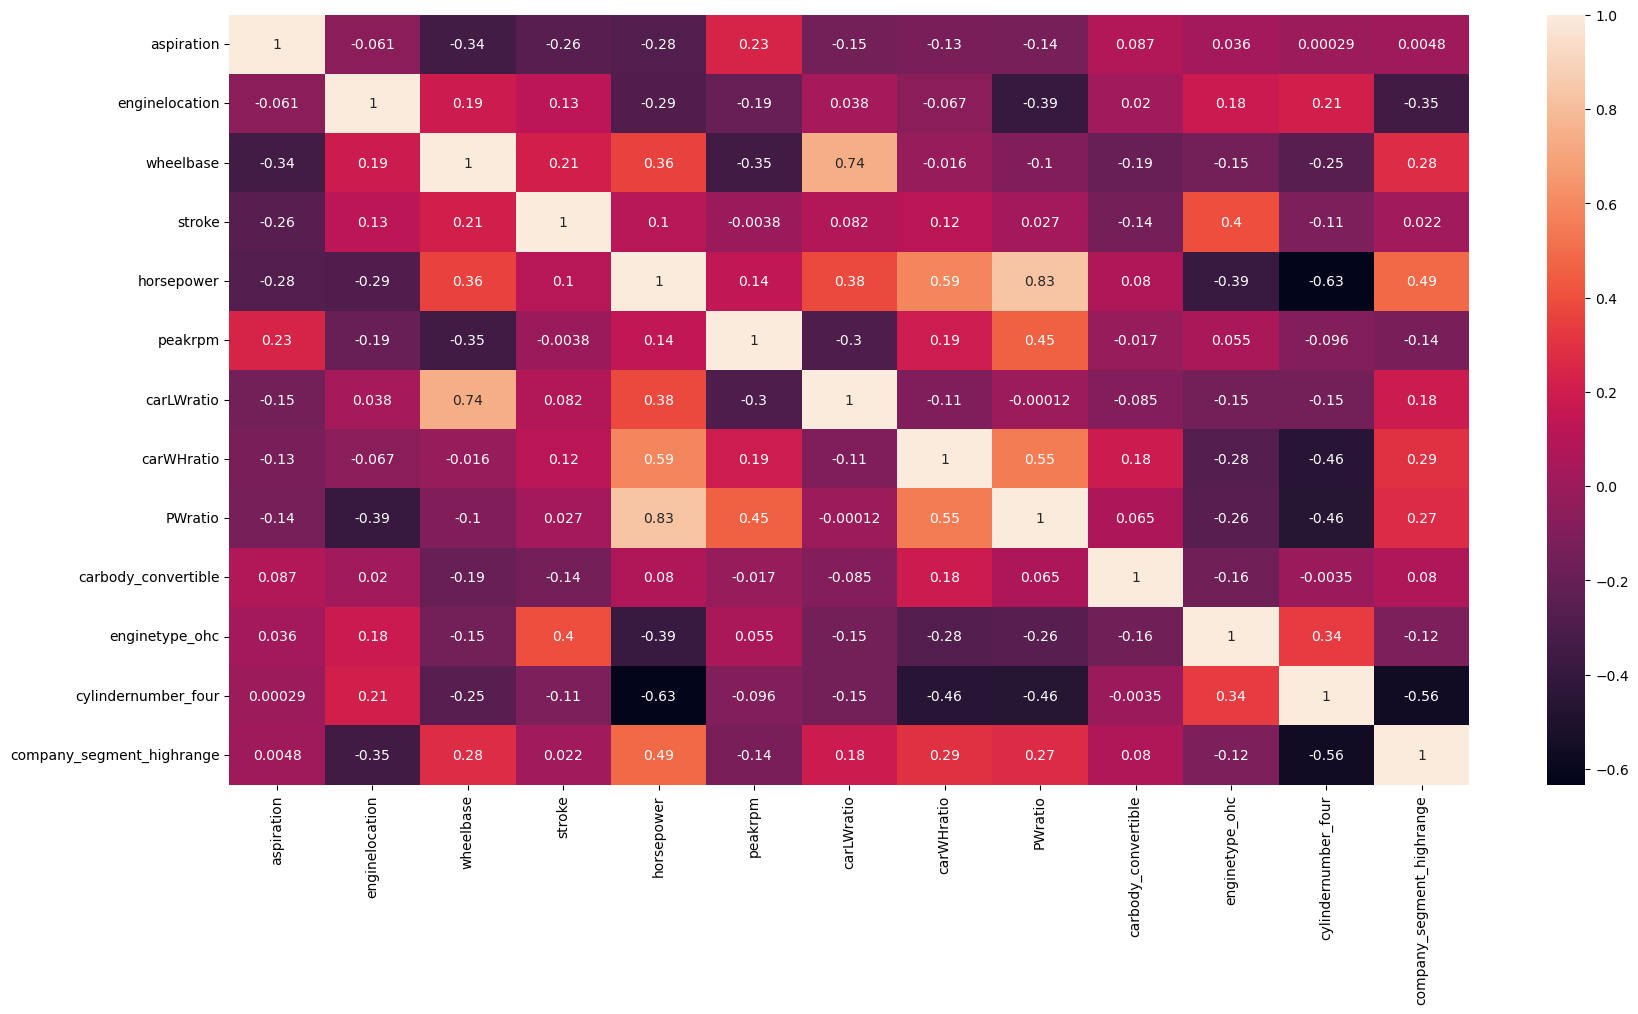

In [88]:
plt.figure(figsize = (20,10))  
sns.heatmap(X_train4.corr(),annot = True)

In [89]:
X_train5 = X_train4.drop(['PWratio','carWHratio'], axis=1)

In [90]:
lm5=fit_LRM(X_train5.astype(float))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     147.9
Date:                Sat, 01 Jun 2024   Prob (F-statistic):           1.67e-67
Time:                        15:52:44   Log-Likelihood:                 192.16
No. Observations:                 141   AIC:                            -360.3
Df Residuals:                     129   BIC:                            -324.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [92]:
getVIF(X_train5.astype(float))

,Features,VIF
1,enginelocation,39.71
6,carLWratio,29.75
3,stroke,20.10
2,wheelbase,18.01
4,horsepower,10.56
9,cylindernumber_four,7.93
0,aspiration,7.44
5,peakrpm,7.33
8,enginetype_ohc,5.67
10,company_segment_highrange,2.12


<Axes: >

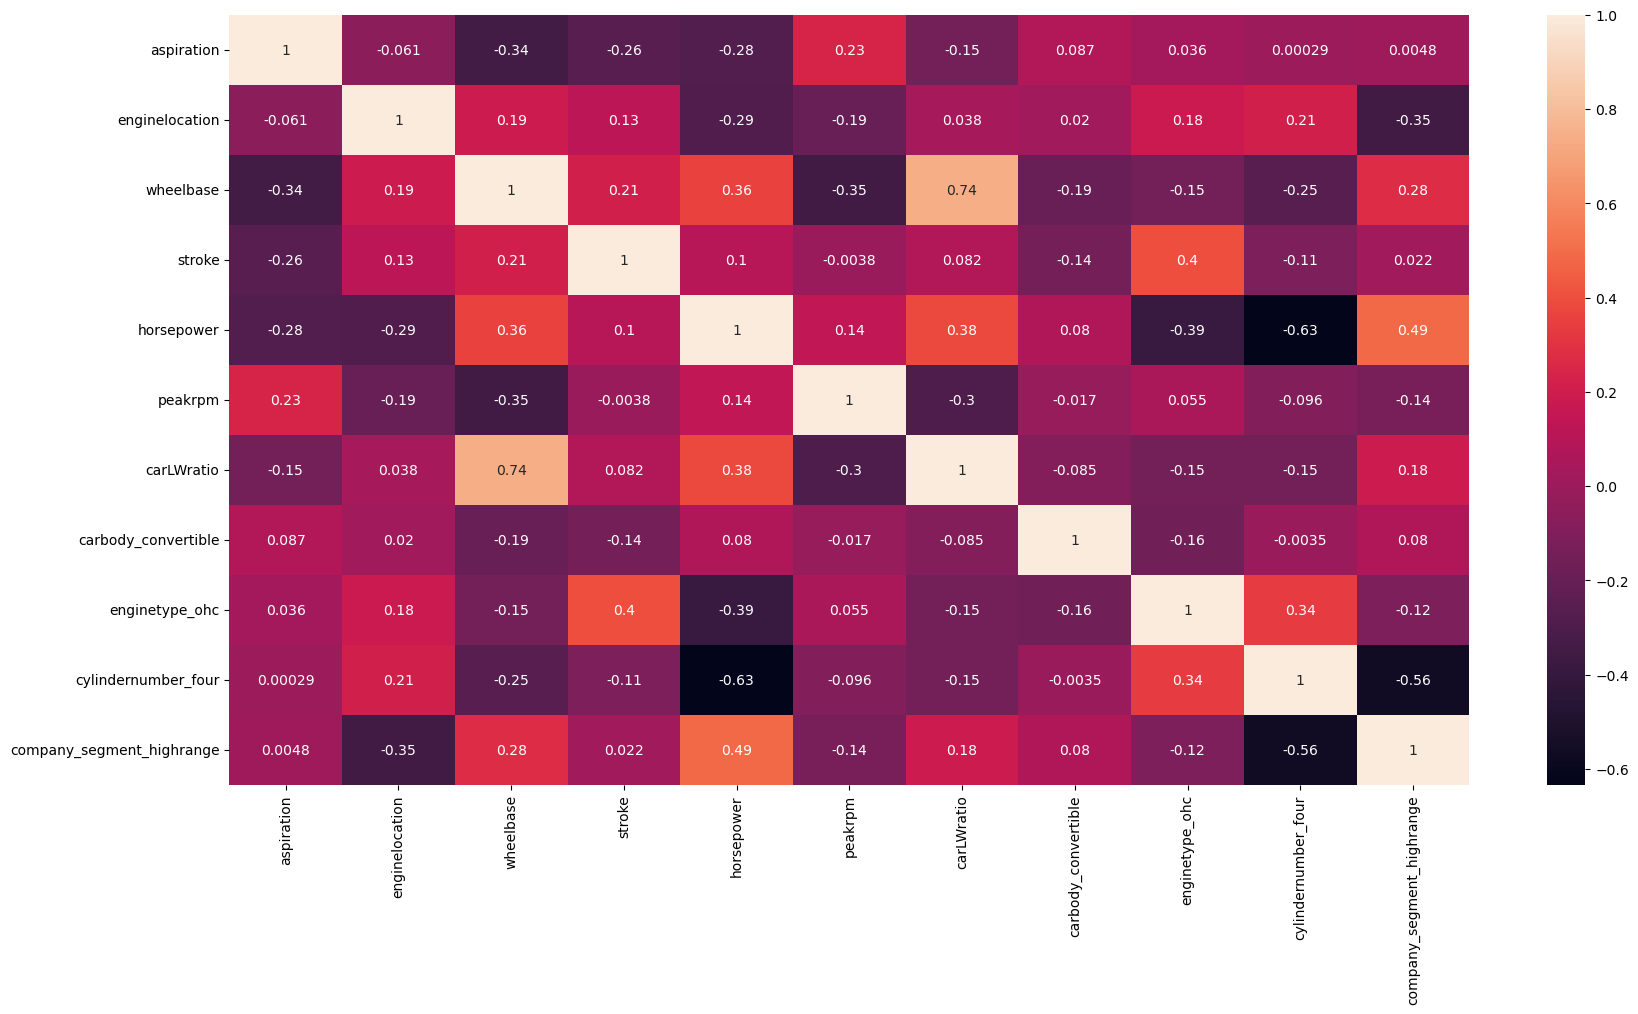

In [93]:
plt.figure(figsize = (20,10))  
sns.heatmap(X_train5.corr(),annot = True)

In [94]:
X_train6 = X_train5.drop('peakrpm', axis=1)

In [95]:
lm6=fit_LRM(X_train6.astype(float))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     162.9
Date:                Sat, 01 Jun 2024   Prob (F-statistic):           1.86e-68
Time:                        15:54:42   Log-Likelihood:                 191.74
No. Observations:                 141   AIC:                            -361.5
Df Residuals:                     130   BIC:                            -329.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [96]:
X_train7 = X_train6.drop('enginetype_ohc', axis=1)

In [97]:
lm7=fit_LRM(X_train7.astype(float))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     180.5
Date:                Sat, 01 Jun 2024   Prob (F-statistic):           2.54e-69
Time:                        15:55:05   Log-Likelihood:                 191.05
No. Observations:                 141   AIC:                            -362.1
Df Residuals:                     131   BIC:                            -332.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [98]:
X_train8 = X_train7.drop('stroke', axis=1)

In [99]:
lm8=fit_LRM(X_train8.astype(float))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     201.7
Date:                Sat, 01 Jun 2024   Prob (F-statistic):           4.03e-70
Time:                        16:04:21   Log-Likelihood:                 190.13
No. Observations:                 141   AIC:                            -362.3
Df Residuals:                     132   BIC:                            -335.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [101]:
getVIF(X_train8.astype(float))

,Features,VIF
4,carLWratio,28.37
1,enginelocation,26.79
2,wheelbase,17.31
6,cylindernumber_four,7.47
3,horsepower,6.82
0,aspiration,6.10
7,company_segment_highrange,1.84
5,carbody_convertible,1.13


<Axes: >

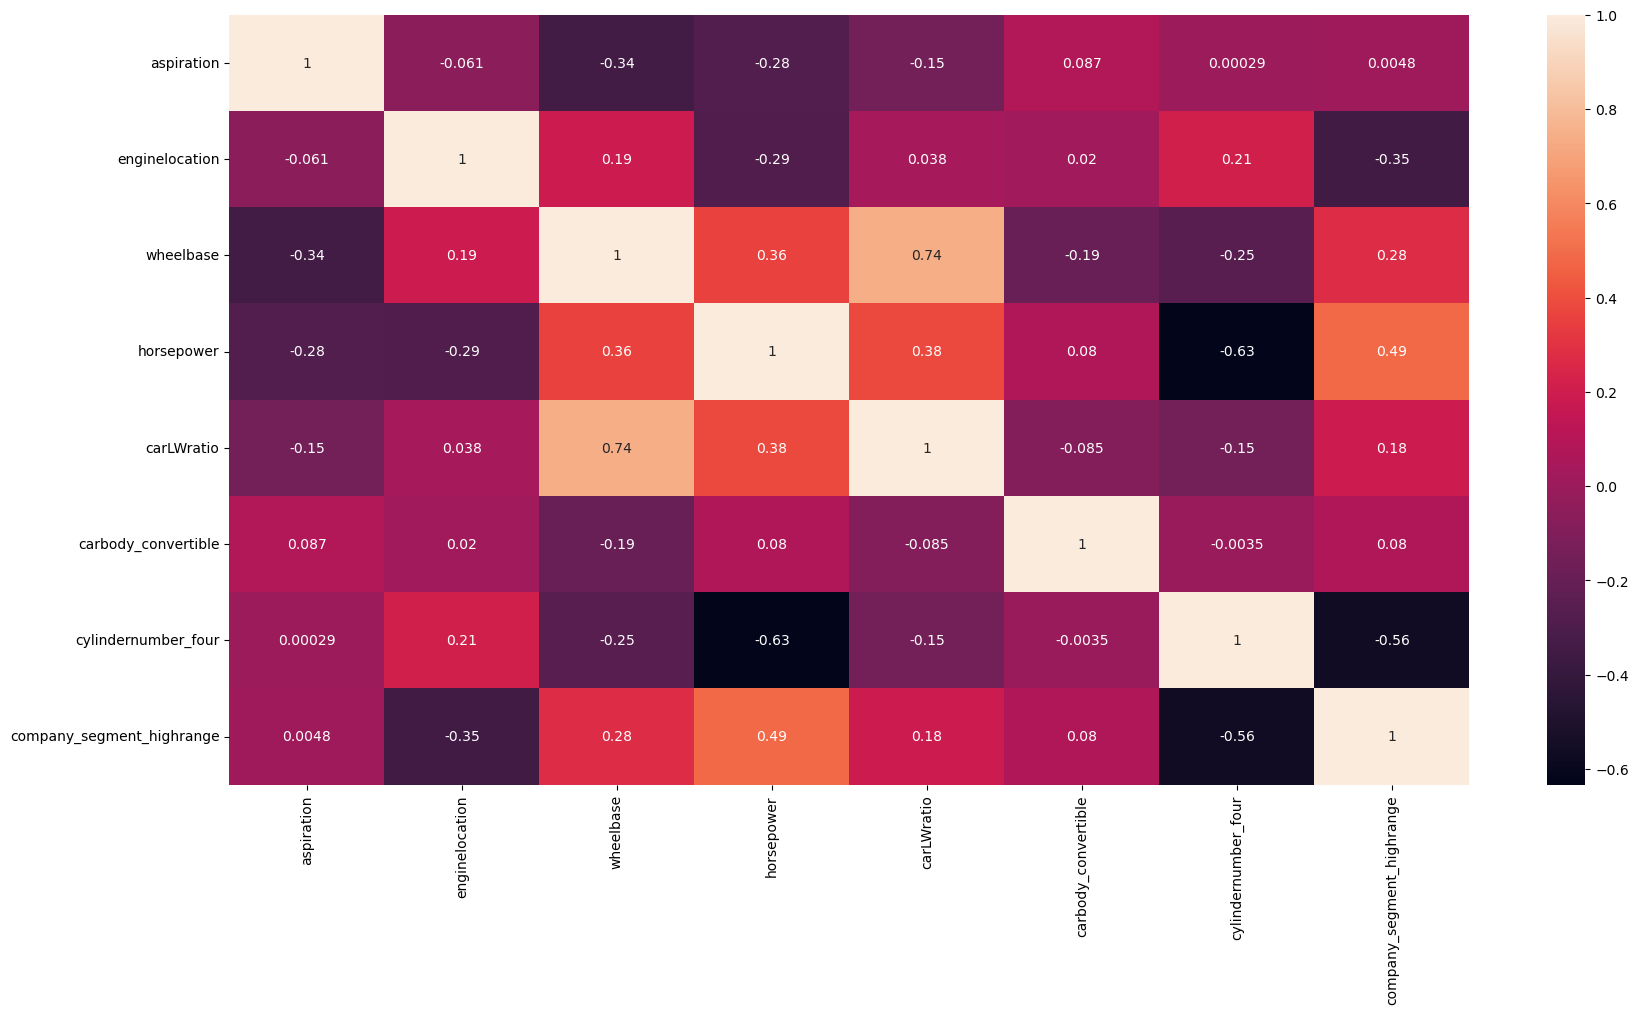

In [102]:
plt.figure(figsize = (20,10))  
sns.heatmap(X_train8.corr(),annot = True)

In [104]:
X_train9 = X_train8.drop(['enginelocation','carLWratio'] , axis=1)

In [105]:
lm9=fit_LRM(X_train9.astype(float))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     229.7
Date:                Sat, 01 Jun 2024   Prob (F-statistic):           5.97e-68
Time:                        16:06:06   Log-Likelihood:                 178.94
No. Observations:                 141   AIC:                            -343.9
Df Residuals:                     134   BIC:                            -323.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [107]:
X_train10 = X_train9.drop('aspiration', axis=1)
X_train10 = sm.add_constant(X_train10)
lm10 = sm.OLS(y_train,X_train10.astype(float)).fit() 
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     273.2
Date:                Sat, 01 Jun 2024   Prob (F-statistic):           9.11e-69
Time:                        16:07:15   Log-Likelihood:                 177.91
No. Observations:                 141   AIC:                            -343.8
Df Residuals:                     135   BIC:                            -326.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [109]:
getVIF(X_train10.astype(float))

,Features,VIF
0,const,19.89
4,cylindernumber_four,1.95
2,horsepower,1.89
5,company_segment_highrange,1.56
1,wheelbase,1.24
3,carbody_convertible,1.08


All the independent variable have low VIF and the **Adj. R-Squared is 0.907** which is quite a significant fit. We will conclude with these variables as the final model predictor variables

## Residual Analysis

In [110]:
y_train_price = lm10.predict(X_train10)

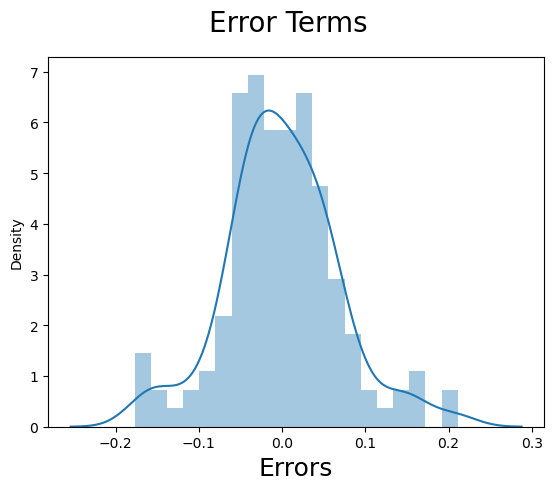

In [112]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  #heading
plt.xlabel('Errors', fontsize = 18)                         #Xlabel
%matplotlib inline

## Making Predictions

In [113]:
# we will hereafter use only those variables which were used to train the dataset
num_vars = ['horsepower','wheelbase','curbweight', 'enginesize', 'boreratio','carLWratio','carWHratio','PWratio','HCmpgratio','stroke','compressionratio','peakrpm','price']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [114]:
y_test = df_test.pop('price')
X_test = df_test

In [115]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_train10= X_train10.drop(['const'], axis=1)
X_test_new = X_test[X_train10.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [116]:
# Making predictions
y_pred = lm10.predict(X_test_new)

## Model Evaluation

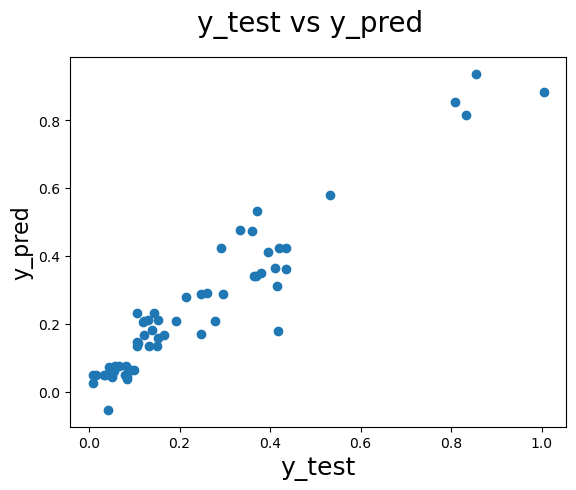

In [118]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
%matplotlib inline

In [119]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('Model RMSE:',rmse)

from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print('Model r2_score:',r2)

Model RMSE: 0.0673924212933167
Model r2_score: 0.9056388935908385


## Conclusion

Final inference from model evaluation

With a low p-value and low VIF, these variables do describe the price of the automobiles to a good extent.
  
Price = **-0.0133** +  **0.3058** x *wheelbase* + **0.3750** x *horsepower* + **0.1815** x *carbody_convertible*  + **-0.0686** x *cylindernumber_four*   + **0.3129**x *company_segment_highrange*  are